# Sentiment Analysis

In this notebook we will be doing some sentiment analysis in python using two different techniques :

1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from (Huggingface) 🤗
3. Huggingface Pipeline

# Read the Data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
# nltk.download('all')

In [2]:
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
DataFrame = pd.read_csv(r'C:\Users\user\Desktop\ImranKhanPTI.csv')

In [4]:
DataFrame.head()

,Date,User,Tweets
0,2022-10-30 14:07:08+00:00,ImranKhanPTI,Shocked &amp; deeply saddened by the terrible ...
1,2022-10-29 17:37:22+00:00,ImranKhanPTI,For all those spreading rumours about my mtg i...
2,2022-10-28 18:43:41+00:00,ImranKhanPTI,Congratulations to Abid Zuberi on his election...
3,2022-10-24 11:28:55+00:00,ImranKhanPTI,We saw a foreign abetted regime change conspir...
4,2022-10-24 11:28:54+00:00,ImranKhanPTI,&amp; safeguarded against excesses by the Stat...


# Quick EDA

In [5]:
DataFrame.shape

(1000, 3)

In [6]:
example = DataFrame['Tweets'].values[0]
example

'Shocked &amp; deeply saddened by the terrible accident that led to the death of Channel 5 reporter Sadaf Naeem during our March today. I have no words to express my sorrow. My prayers &amp; condolences go to the family at this tragic time. We have cancelled our March for today.'

In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Shocked',
 '&',
 'amp',
 ';',
 'deeply',
 'saddened',
 'by',
 'the',
 'terrible',
 'accident']

### POS Tagging
POS Tagging in NLTK is a process to mark up the words in text format for a particular part of a speech based on its definition and context. Some NLTK POS tagging examples are: CC, CD, EX, JJ, MD, NNP, PDT, PRP$, TO, etc. POS tagger is used to assign grammatical information of each word of the sentence

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Shocked', 'NNP'),
 ('&', 'CC'),
 ('amp', 'NN'),
 (';', ':'),
 ('deeply', 'RB'),
 ('saddened', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('terrible', 'JJ'),
 ('accident', 'NN')]

In [9]:
# The primary usage of chunking is to make a group of "noun phrases." The parts of speech are combin.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint # pretty print

<bound method Tree.pprint of Tree('S', [('Shocked', 'NNP'), ('&', 'CC'), ('amp', 'NN'), (';', ':'), ('deeply', 'RB'), ('saddened', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('terrible', 'JJ'), ('accident', 'NN'), ('that', 'WDT'), ('led', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('death', 'NN'), ('of', 'IN'), Tree('ORGANIZATION', [('Channel', 'NNP')]), ('5', 'CD'), ('reporter', 'NN'), Tree('PERSON', [('Sadaf', 'NNP'), ('Naeem', 'NNP')]), ('during', 'IN'), ('our', 'PRP$'), ('March', 'NNP'), ('today', 'NN'), ('.', '.'), ('I', 'PRP'), ('have', 'VBP'), ('no', 'DT'), ('words', 'NNS'), ('to', 'TO'), ('express', 'VB'), ('my', 'PRP$'), ('sorrow', 'NN'), ('.', '.'), ('My', 'NNP'), ('prayers', 'NNS'), ('&', 'CC'), ('amp', 'NN'), (';', ':'), ('condolences', 'NNS'), ('go', 'VBP'), ('to', 'TO'), ('the', 'DT'), ('family', 'NN'), ('at', 'IN'), ('this', 'DT'), ('tragic', 'JJ'), ('time', 'NN'), ('.', '.'), ('We', 'PRP'), ('have', 'VBP'), ('cancelled', 'VBN'), ('our', 'PRP$'), ('March', 'NNP'), ('for', 'IN'), ('t

# Feature Engineering

In [10]:
# Lets drop the unnecessary columns
df = DataFrame.drop(['Date', 'User'], axis = 'columns')
df.head()

,Tweets
0,Shocked &amp; deeply saddened by the terrible ...
1,For all those spreading rumours about my mtg i...
2,Congratulations to Abid Zuberi on his election...
3,We saw a foreign abetted regime change conspir...
4,&amp; safeguarded against excesses by the Stat...


In [11]:
df.insert(loc = 0, column ='id', value = df.index+1)
df.head()

,id,Tweets
0,1,Shocked &amp; deeply saddened by the terrible ...
1,2,For all those spreading rumours about my mtg i...
2,3,Congratulations to Abid Zuberi on his election...
3,4,We saw a foreign abetted regime change conspir...
4,5,&amp; safeguarded against excesses by the Stat...


# Import Sentiment Analyzer

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
# tqdm is a library in Python which is used for creating Progress Meters or Progress Bars. tqdm got its name from the Arabic name taqaddum which means 'progress'.

sia = SentimentIntensityAnalyzer()

In [13]:
sia

In [14]:
sia.polarity_scores(example)

{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.9781}

In [15]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Tweets']
    myid = row['id']
    result[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders = vaders.merge(df)

In [17]:
# Now we have sentiment scores and metadata
vaders.head()

,id,neg,neu,pos,compound,Tweets
0,1,0.411,0.589,0.000,-0.9781,Shocked &amp; deeply saddened by the terrible ...
1,2,0.050,0.856,0.094,0.5574,For all those spreading rumours about my mtg i...
2,3,0.000,0.698,0.302,0.5994,Congratulations to Abid Zuberi on his election...
3,4,0.181,0.819,0.000,-0.8519,We saw a foreign abetted regime change conspir...
4,5,0.201,0.719,0.080,-0.7717,&amp; safeguarded against excesses by the Stat...


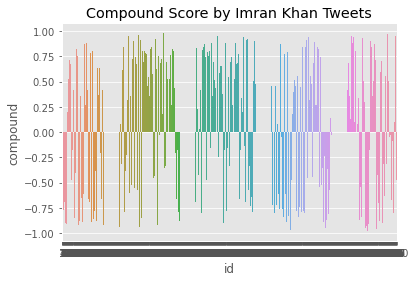

In [18]:
ax = sns.barplot(data=vaders, x='id', y='compound')
ax.set_title('Compound Score by Imran Khan Tweets')
plt.show()

# Roberta Pretrained Model

1. Use a model trained of a large corpus of data.
2. Transformer model accounts for the words but also the context related to other words.

In [19]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [21]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
# VADER result on example
print(example)
sia.polarity_scores(example)

Shocked &amp; deeply saddened by the terrible accident that led to the death of Channel 5 reporter Sadaf Naeem during our March today. I have no words to express my sorrow. My prayers &amp; condolences go to the family at this tragic time. We have cancelled our March for today.


{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.9781}

In [32]:
# Run for Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.89151704, 'roberta_neu': 0.096792825, 'roberta_pos': 0.011690202}


In [46]:
# Run the Roberta model as function
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [55]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Tweets']
    myid = row['id']
    vader_result = sia.polarity_scores(text)
    
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f'vader_{key}'] = value
        
    roberta_result = polarity_scores_roberta(text)
    
    both = {**vader_result_rename, **roberta_result}
    result[myid] = both

  0%|          | 0/1000 [00:00<?, ?it/s]

In [67]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns = {'index' : 'id'})
results_df = results_df.merge(df)

In [68]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Tweets
0,1,0.411,0.589,0.000,-0.9781,0.891517,0.096793,0.011690,Shocked &amp; deeply saddened by the terrible ...
1,2,0.050,0.856,0.094,0.5574,0.135448,0.739988,0.124564,For all those spreading rumours about my mtg i...
2,3,0.000,0.698,0.302,0.5994,0.000912,0.026278,0.972810,Congratulations to Abid Zuberi on his election...
3,4,0.181,0.819,0.000,-0.8519,0.706278,0.284221,0.009501,We saw a foreign abetted regime change conspir...
4,5,0.201,0.719,0.080,-0.7717,0.849358,0.145258,0.005384,&amp; safeguarded against excesses by the Stat...


# Compare scores between Models

In [69]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Tweets'],
      dtype='object')

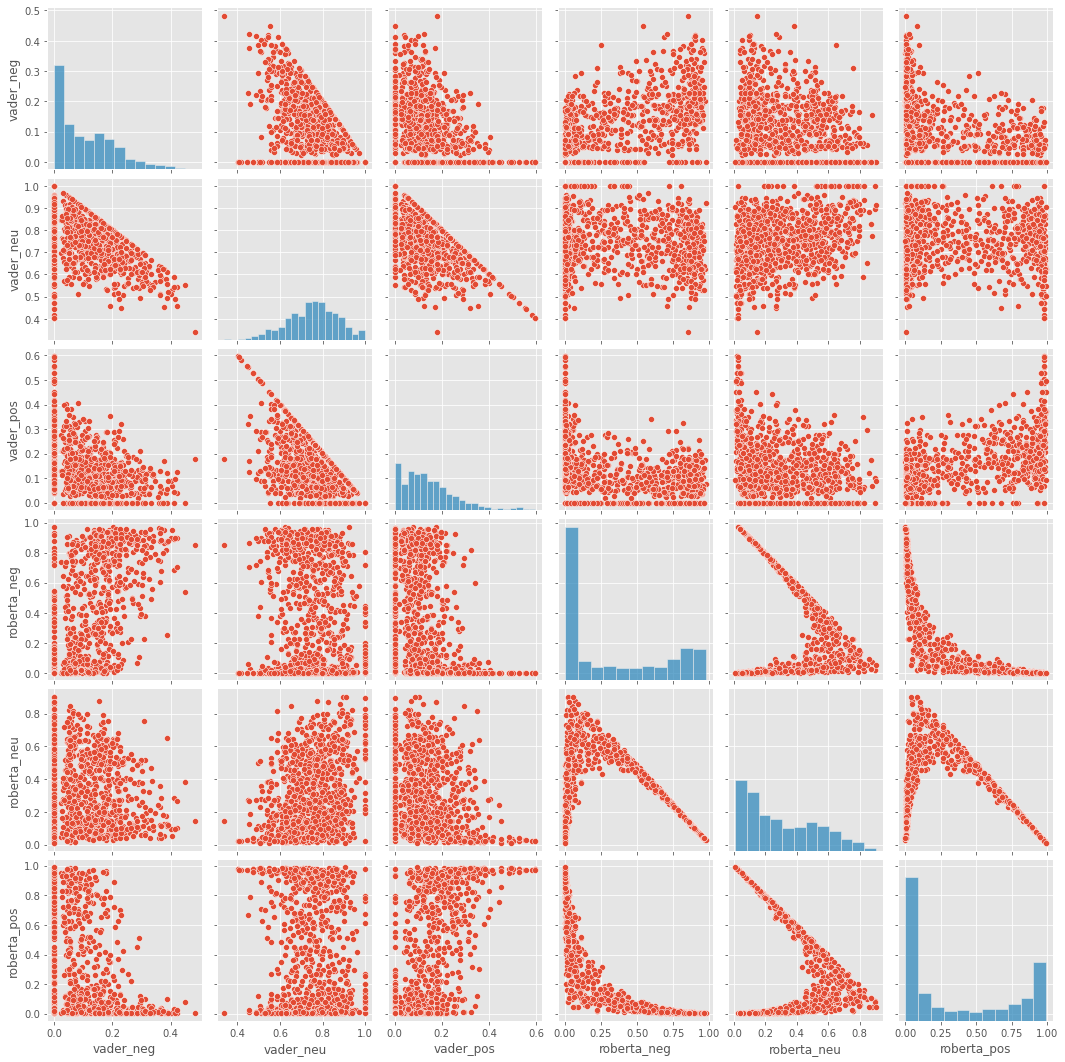

In [84]:
sns.pairplot(data = results_df , 
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
             'roberta_neg', 'roberta_neu', 'roberta_pos'])
plt.show()

# The Transformers Pipeline

Quick & easy way to run sentiment predictions

In [86]:
from transformers import pipeline

In [87]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [88]:
sentiment_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [89]:
sentiment_pipeline('Make sure to comment and Upvoted!')

[{'label': 'POSITIVE', 'score': 0.9988288283348083}]

In [90]:
sentiment_pipeline('I am not in the mood to watch a movie now.')

[{'label': 'NEGATIVE', 'score': 0.9994232654571533}]

# Thank You!